In [1]:
import numpy as np

def signo(x):
    x = np.where(x > 0, 1, -1)
    return x

# Definición de variables
e_probabilidad = [0.001, 0.0036, 0.01, 0.05, 0.1]
C_esperado = [0.105, 0.138, 0.185, 0.37, 0.61]
# Inicialización de resultados
p_error = np.zeros(len(e_probabilidad))
C = np.zeros(p_error.shape)
img_ancho = 110

# generacion de patrones
w = np.zeros((img_ancho**2, img_ancho**2))
p_max = 0
# Cálculo de resultados
for i in range(len(e_probabilidad)):
    
    while p_error[i] < e_probabilidad[i]:
        # generación de patrones
        x = 2*np.random.binomial(1, 0.499, (img_ancho, img_ancho)) - 1
        w += np.outer(x, x)
        np.fill_diagonal(w, 0)
        x_aux = np.dot(w, x.flatten())
        x_aux = signo(x_aux.reshape(img_ancho, img_ancho))
        p_max += 1
        p_error[i] = np.mean(x_aux != x)


    C[i] = (p_max)/(x.size)
    print('Probabilidad de error calculada: ', p_error[i], 'para una probabilidad de ', e_probabilidad[i])
    print('Capacidad de almacenamiento calculada: ', C[i], 'para una capacidad esperada de ', C_esperado[i])        

KeyboardInterrupt: 

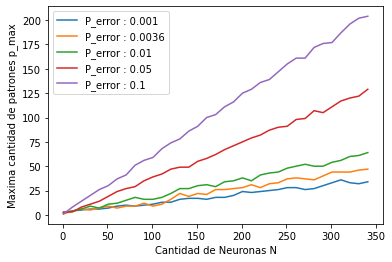

<Figure size 432x288 with 0 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def signo(x):
    x = np.where(x > 0, 1, -1)
    return x


# Definición de var
N = np.arange(1, 350, 10)
e_probabilidad = [0.001, 0.0036, 0.01, 0.05, 0.1]

# Inicialización de p_max y C
p_max = np.zeros((len(N), len(e_probabilidad)))
C = np.zeros((len(N), len(e_probabilidad)))

# Realización para cada 1 de las p_error
for k in range(len(e_probabilidad)):
    for i in range(len(N)):
        p = 0
        err = 0
        while err < e_probabilidad[k]:
            p += 1  # incremento la # de patrones
            
            # Construyo la matriz de pesos sinápticos
            P = 2 * np.random.binomial(1, 0.5, (N[i], p)) - 1
            w = P @ P.T
            np.fill_diagonal(w, 0)

            # Computo el error global
            err = np.mean(signo(np.dot(w, P)) != P)
            
        # Guardo los valores
        p_max[i, k] = p
        C[i, k] = (p_max[i, k] - 1) / N[i]  # Capacidad de almacenamiento

# Gráfico
plt.figure(1)
leyendas = []
for k in range(len(e_probabilidad)):
    plt.plot(N, p_max[:, k], label=f"P_error : {e_probabilidad[k]}")
plt.xlabel("Cantidad de Neuronas N")
plt.ylabel("Maxima cantidad de patrones p_max")
plt.legend()
plt.show()
plt.savefig('Capacidad_de_almacenamiento para imagenes similares.png')

In [4]:
P = 2 * np.random.binomial(1, 0.5, (10, 2)) - 1
W = P @ P.T - 2 * np.eye(10)
w1 = np.outer()